# Content and Objective

+ Show behavior and correlation and pdfs of a set of data being imported.
+ Pandas is being used since this significantly simplifies importing, extracting, and dealing with data frames.
+ Even if you are not interested in dealing with pandas, understanding of operations should still be possible.

# Import

In [1]:
# importing
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Importing Data

NOTE: file "Umfragedaten_v1_an.xlsx" required; can be found at http://wikis.fu-berlin.de/pages/viewpage.action?pageId=696156185

NOTE 2: Importing and dealing with data may be relevant if your are interested in this stuff. Otherwise you may skip those lines.

NOTE 3: The following lines are using "pandas" being a Python module for dealing with data frames. 

In [3]:
# load data frame
df = pd.read_excel( 'Umfragedaten_v1_an.xlsx' )

In [4]:
# extract according data (size, weight) by slicing data out of the data frame
size_weight = df[ ['GESCHL', 'GRO', 'GEW'] ]

# removing NaN values
size_weight = size_weight.dropna( how='any' )

# extract from data-frame to numpy arrays
size = size_weight[ 'GRO' ].values
weight = size_weight[ 'GEW' ].values

In [5]:
# NOTE: Finding least squares solution for linear regression, 
#       which is not discussed in this leture
S = np.ones( (len(size) , 2) )
S[ :, 0 ] = size
params = np.dot( np.linalg.pinv( S ) , weight )
 
# including linear regression    
regression = params[0] * np.array(size) + params[1]

# Plotting Data

(0, 220)

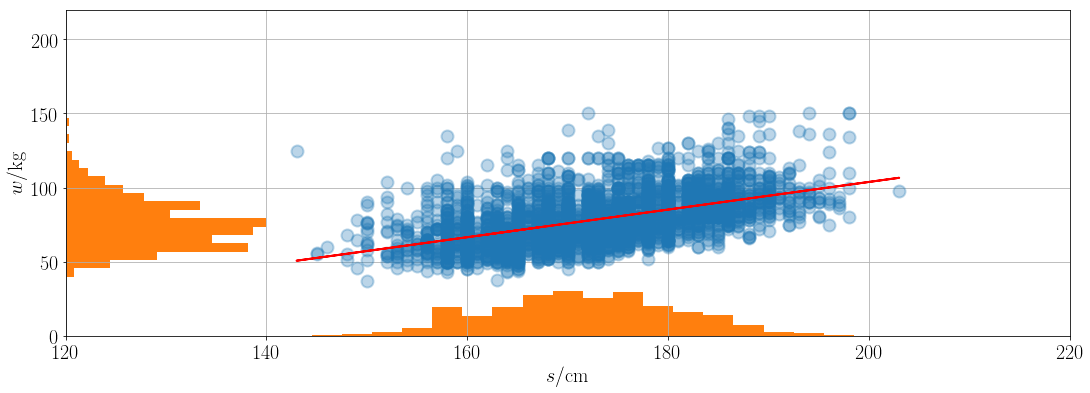

In [6]:
# plotting

# point cloud of (size,weight) pairs
plt.plot( size, weight, '.', alpha=.3, ms = 24, mew = 2.0)    
   
# linear regression
plt.plot( size, regression, linewidth=2.0, color='r' )

# histograms on x- and y-axis
bins = 20

w_hist = np.histogram( weight, bins = bins, density = 1 )
width = ( np.max( weight ) - np.min( weight) ) / bins
plt.barh( w_hist[1][:-1] , 120 + w_hist[0] / np.max( w_hist[0]) * 20, width, color = '#ff7f0e' )   

s_hist = np.histogram( size, bins = bins, density = 1 )
width = ( np.max( size ) - np.min( size) ) / bins
plt.bar( s_hist[1][:-1] , s_hist[0] / np.max( s_hist[0]) * 30, width, color = '#ff7f0e' ) 

# axes and stuff
plt.grid( True )
plt.xlabel('$s/\mathrm{cm}$')
plt.ylabel('$w/\mathrm{kg}$')

plt.xlim( (120, 220 ) )
plt.ylim( (0, 220 ) )

In [7]:
# getting men and women
size_weight_m = size_weight[ size_weight.GESCHL == 'MAENNLICH' ]
size_weight_w = size_weight[ size_weight.GESCHL == 'WEIBLICH' ]

size_w = size_weight_w[ 'GRO' ].values
weight_w = size_weight_w[ 'GEW' ].values

size_m = size_weight_m[ 'GRO' ].values
weight_m = size_weight_m[ 'GEW' ].values

(0, 200)

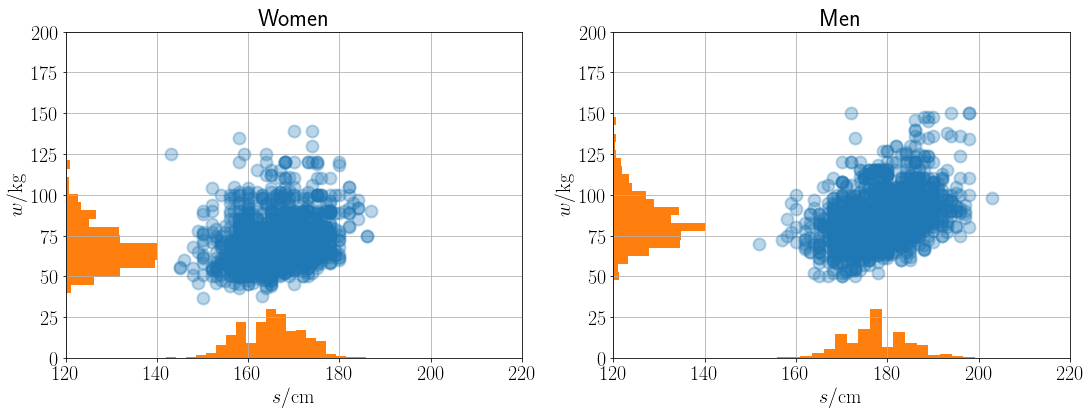

In [8]:
# plotting

# point cloud of (size,weight) pairs for women
plt.subplot(121)
plt.plot( size_w, weight_w, '.', alpha=.3, ms = 24, mew = 2.0)    

# histograms on x- and y-axis
bins = 20

w_hist = np.histogram( weight_w, bins = bins, density = 1 )
width = ( np.max( weight_w ) - np.min( weight_w ) ) / bins
plt.barh( w_hist[1][:-1] , 120 + w_hist[0] / np.max( w_hist[0]) * 20, width, color = '#ff7f0e' )   

s_hist = np.histogram( size_w, bins = bins, density = 1 )
width = ( np.max( size_w ) - np.min( size_w) ) / bins
plt.bar( s_hist[1][:-1] , s_hist[0] / np.max( s_hist[0]) * 30, width, color = '#ff7f0e' ) 


# axes and stuff
plt.title('Women')
plt.grid( True )
plt.xlabel('$s/\mathrm{cm}$')
plt.ylabel('$w/\mathrm{kg}$')
plt.xlim( (120, 220 ) )
plt.ylim( (0, 200 ) )


# now men
plt.subplot(122)
plt.plot( size_m, weight_m, '.', alpha=.3, ms = 24, mew = 2.0)    

# histograms on x- and y-axis
bins = 20

w_hist = np.histogram( weight_m, bins = bins, density = 1 )
width = ( np.max( weight_m ) - np.min( weight_m ) ) / bins
plt.barh( w_hist[1][:-1] , 120 + w_hist[0] / np.max( w_hist[0]) * 20, width, color = '#ff7f0e' )   

s_hist = np.histogram( size_m, bins = bins, density = 1 )
width = ( np.max( size_m ) - np.min( size_m) ) / bins
plt.bar( s_hist[1][:-1] , s_hist[0] / np.max( s_hist[0]) * 30, width, color = '#ff7f0e' ) 


# axes and stuff
plt.title('Men')
plt.grid( True )
plt.xlabel('$s/\mathrm{cm}$')
plt.ylabel('$w/\mathrm{kg}$')
plt.xlim( (120, 220 ) )
plt.ylim( (0, 200 ) )

# Get Marginal PDFs and Plot

In [9]:
# reduce to weights where size is within predefined interval
weight_160 = [ w for w, s in zip( weight, size ) if s <= 160 ]
weight_160_180 = [ w for w, s in zip( weight, size ) if 160 < s <= 180 ]    
weight_180_ = [ w for w, s in zip( weight, size ) if s > 180 ]

Text(0.5,1,'$H_{653}(w| s>180 )$')

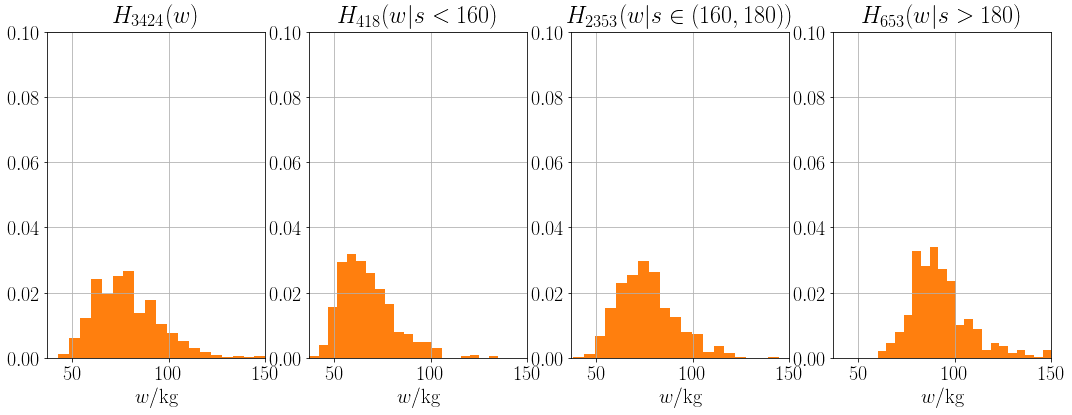

In [10]:
# plotting
plt.subplot(141)
plt.hist( weight, bins=bins, color='#ff7f0e', density = 1 )

plt.grid(True)
plt.xlim( ( np.min(weight), np.max(weight) ) )
plt.ylim( (0, .1 ) )
plt.xlabel('$w/\mathrm{kg}$')
plt.title('$H_{{{}}}(w)$'.format(len(size)))


plt.subplot(142)
plt.hist( weight_160, bins=bins, color='#ff7f0e', density = 1 )

plt.grid(True)
plt.xlim( ( np.min(weight), np.max(weight) ) )    
plt.ylim( (0, .1 ) )
plt.xlabel('$w/\mathrm{kg}$')
plt.title('$H_{{{}}}(w|s<160)$'.format(len(weight_160)))


plt.subplot(143)
plt.hist( weight_160_180, bins=bins, color='#ff7f0e', density = 1 )

plt.grid(True)
plt.xlim( ( np.min(weight), np.max(weight) ) )    
plt.ylim( (0, .1 ) )
plt.xlabel('$w/\mathrm{kg}$')
plt.title('$H_{{{}}}(w|s\\in(160,180))$'.format(len(weight_160_180)))

plt.subplot(144)
plt.hist( weight_180_, bins=bins, color='#ff7f0e', density = 1 )

plt.grid(True)
plt.xlim( ( np.min(weight), np.max(weight) ) )
plt.ylim( (0, .1 ) )
plt.xlabel('$w/\mathrm{kg}$')
plt.title('$H_{{{}}}(w| s>180 )$'.format(len(weight_180_)))

# Printing Some Numbers

In [11]:
# output various numbers
print('Number of data sets: \t\t\t\t{}'.format( len( weight ) ) )
print('Number of data sets with s <= 160: \t\t{}'.format( len( weight_160) ) )
print('Number of data sets with 160 < s <= 180: \t{}'.format( len( weight_160_180 ) ) )
print('Number of data sets with s > 180: \t\t{}\n'.format( len( weight_180_) ) )

print('----------')

print('Notation: S = Size; W = Weight\n')

print('E( S ) = {:2.2f} cm'.format( np.average( size) ) )
print('D( S ) = {:2.2f} cm\n'.format( np.std( size) ) )

print('E( W ) = {:2.2f} kg'.format( np.average( weight) ) )
print('D( W ) = {:2.2f} kg\n'.format( np.std( weight) ) )

print('E( W | S <= 160 ) = \t\t{:2.2f} kg'.format( np.average( weight_160) ) )
print('E( W | 160 < S <= 180 ) = \t{:2.2f} kg'.format( np.average( weight_160_180) ) )
print('E( W | S > 180 ) = \t\t{:2.2f} kg\n'.format( np.average( weight_180_) ) )


print('----------')

# find and print least squares solution
print('Parameter estimation in linear model w = a s + b:   a = {:2.2f} kg/cm, b = {:2.2f} kg'.format( params[0], params[1] ) )

Number of data sets: 				3424
Number of data sets with s <= 160: 		418
Number of data sets with 160 < s <= 180: 	2353
Number of data sets with s > 180: 		653

----------
Notation: S = Size; W = Weight

E( S ) = 172.66 cm
D( S ) = 9.34 cm

E( W ) = 78.36 kg
D( W ) = 16.62 kg

E( W | S <= 160 ) = 		67.54 kg
E( W | 160 < S <= 180 ) = 	76.43 kg
E( W | S > 180 ) = 		92.25 kg

----------
Parameter estimation in linear model w = a s + b:   a = 0.93 kg/cm, b = -82.57 kg


# Find and print correlation coefficient    

In [12]:
rho = np.corrcoef( size, weight )
print('Correlation coefficient: {:2.4f}\n'.format( rho[0,1] ) )

rho_w = np.corrcoef( size_w, weight_w )
print('Correlation coefficient women: {:2.4f}\n'.format( rho_w[0,1] ) )

rho_m = np.corrcoef( size_m, weight_m )
print('Correlation coefficient men: {:2.4f}\n'.format( rho_m[0,1] ) )

Correlation coefficient: 0.5239

Correlation coefficient women: 0.2472

Correlation coefficient men: 0.4074



# Playground for Experiments

You may, if you like to, try to plot/identifiy dependencies in other pairs of data